<a href="https://colab.research.google.com/github/teddcp/Data-visualization/blob/master/Practicing_with_Seaborn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution Plots
=====================================

1. distplot
2. jointplot - scatter,reg,kde,hex,resid
3. pairplot
4. rugplot
5. kdeplot

In [3]:
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


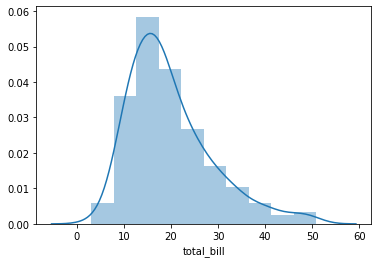

In [5]:
sns.distplot(data['total_bill'],
             kde=True,rug=False, hist=True,
             bins=10)

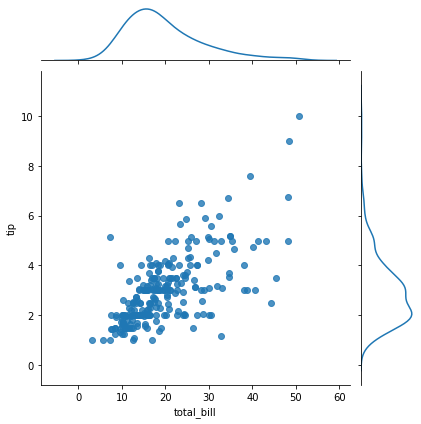

In [18]:
g=sns.jointplot(x='total_bill',y='tip',data=data,
              kind='reg',
              joint_kws={'fit_reg': False},
              marginal_kws={'hist' :False})


###########################################
# Using JointGrid
# g = sns.JointGrid(data=df, x="Tuition", y="ADM_RATE_ALL")
# g.plot(sns.regplot,sns.kdeplot) 

# or we can customize further   
# g = g.plot_joint(sns.kdeplot) 
# g = g.plot_marginals(sns.kdeplot, shade=True) 
# g = g.annotate(stats.pearsonr)

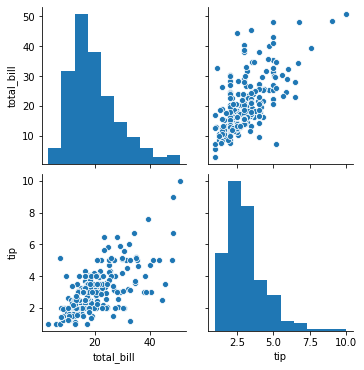

In [19]:
sns.pairplot(data,vars=['total_bill','tip'],palette='inferno')

# g = sns.PairGrid(iris)
# g.map_diag(plt.hist)
# g.map_upper(plt.scatter)
# g.map_lower(sns.kdeplot)

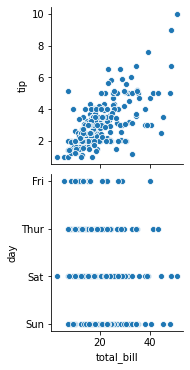

In [28]:
sns.pairplot(data,
             x_vars=['total_bill'],
             y_vars=['tip','day'],
             kind='scatter',diag_kind='kde',
             palette='inferno')

# Categorical plot
---------------------------------

```
factorplot or catplot
boxplot
violinplot
stripplot
swarmplot
barplot
countplot

```

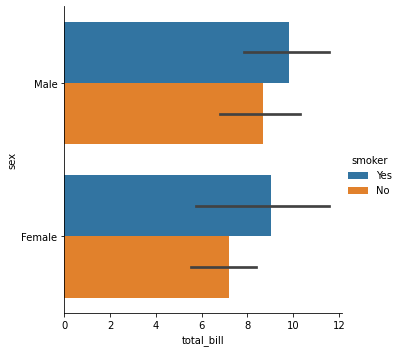

In [32]:
import numpy as np

sns.catplot(x='total_bill',y='sex',kind='bar',data=data,
            hue='smoker',ci=95,estimator=np.std)

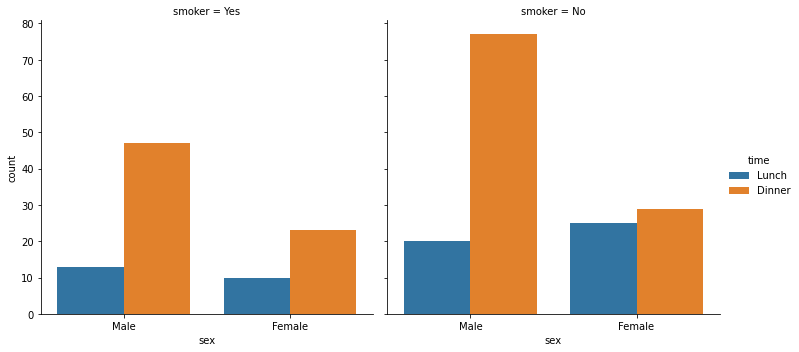

In [38]:
sns.catplot(x='sex',kind='count',data=data,
            hue='time',col='smoker',
            ci=95,estimator=np.std)

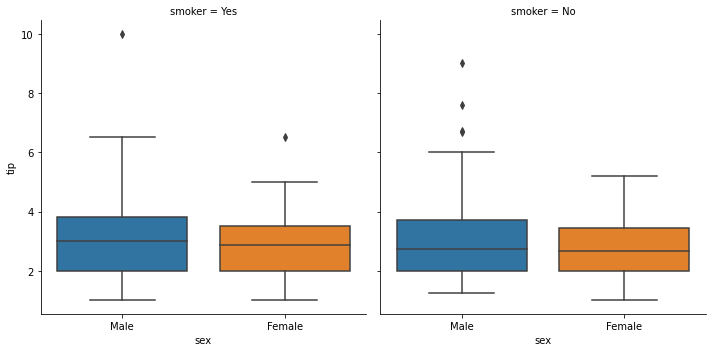

In [52]:
sns.catplot(x='sex',y='tip',
            data=data,kind='box',
            col='smoker')

# #sym for outliers   sym='' -> we can vanish the outliers 
# whis for whiskers  whis=2 -> 2 * IQR
# orient : v or h

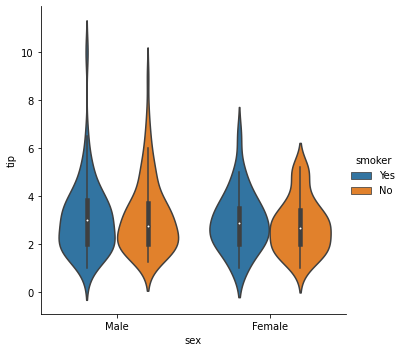

In [41]:
sns.catplot(x='sex',y='tip',
            data=data,kind='violin',
            hue='smoker')

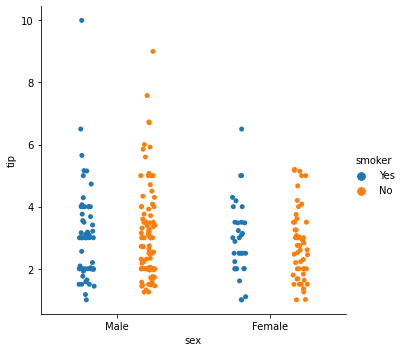

In [47]:
sns.catplot(x='sex',y='tip',
            data=data,kind='strip',
            hue='smoker',
            dodge=True,jitter=True)

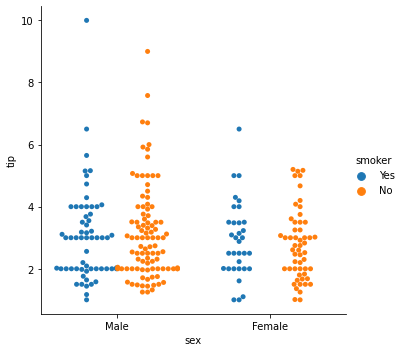

In [49]:
sns.catplot(x='sex',y='tip',
            data=data,kind='swarm',
            hue='smoker',
            dodge=True)

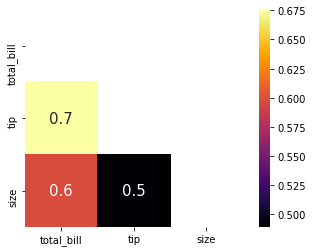

In [68]:
corr=data.corr()

mask= np.triu(corr)
sns.heatmap(data.corr(),annot=True,mask=mask,fmt='.1f',
            square=True,annot_kws={'size':15},
            cmap='inferno')

# http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

# Notes
===========================

```
Data Visualization
================================

sns.despine(left=True)

sns.set(color_codes=True)
sns.distplot(df['fmr_3'], color='____')


sns.set_palette(p) # p can be bright dark pastel colorblind

sns.palettes.SEABORN_PALETTES


# cReating the Custom plaettes
sns.palplot(sns.color_palette('Purples',8))


CUSTOMIZING SEABORN WITH MATPLOTLIB
===========================================
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.distplot(df['fmr_3'], ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel="3 Bedroom Fair Market Rent",xlim, title)

# Show the plot
plt.show()



# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.distplot(df['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.distplot(df['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()



lvplot -> similar to box and violin plot



# Create a scatter plot by disabling the regression line
sns.regplot(data=df,
            y='Tuition',
            x="UG",
            fit_reg=False,
			x_bins=5,
			x_estimator=mean
			order=5
			
			
		
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cmap='BuGn', cbar="False", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Show the plot
plt.show()
plt.clf()

################################################################

FacetGrid -> Factorplot -> lmplot,catplot
pairGrid  -> Pairplot
jointGird -> JointPlot


		# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
		g2 = sns.FacetGrid(df, 
					 row="Degree_Type",
					 row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

		# Map a pointplot of SAT_AVG_ALL onto the grid
		g2.map(sns.pointplot, 'SAT_AVG_ALL')


		# Create the same PairGrid but map a histogram on the diag
		g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
		g2 = g.map_diag(plt.hist)
		g3 = g2.map_offdiag(plt.scatter)

		plt.show()
		plt.clf()

########################################################################

# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()



PANDAS PLOTTING
=================================
https://www.geeksforgeeks.org/different-plotting-using-pandas-and-matplotlib/
https://www.tutorialspoint.com/python_pandas/python_pandas_visualization.htm
https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
https://www.tutorialgateway.org/pandas-dataframe-plot/


```